In [29]:
#importing modules 
import pandas as pd 
#to split data for train and test
from sklearn.model_selection import train_test_split
#Decision Tree machine learning
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, roc_auc_score
import numpy as np

The data contains patients with its ID and status of breast mass and diagnosed results if it is malignant or benign

# data cleaning 

In [2]:
#changing CSV file to dataframe
df = pd.read_csv('Breast Cancer Wisconsin.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

all datas are float type except diagnosis

In [3]:
df.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [4]:
#checking unnamed column
df['Unnamed: 32'].unique()

array([nan])

I'll later drop this column since it contains no values

In [5]:
#Checking if there's anyother value except benige or Malignant
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

In [6]:
#replacing values to 0 or 1
def replace1(row):
    if 'M' in row: 
        return 1
    else:
        return 0


In [7]:
df['diagnosis'] = df['diagnosis'].apply(replace1)

In [8]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [9]:
#dropping unnecessary columns
data = df.drop(columns=['id', 'Unnamed: 32'])
data

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


# data exploration


In [10]:
#dropping diagnosis column for Y value
X = data.drop(['diagnosis'], axis=1)

y = data['diagnosis']

y

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int64

processing

In [11]:
#importing module and standard features before spliting
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)

In [12]:
#splitting X and y data to 80% training set and 20% test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state=10)

# applying decision tree model

In [13]:
#fitting in train dataset and predict values
tree_model = DecisionTreeClassifier(criterion = 'entropy', max_depth = 5)
tree_model.fit(X_train, y_train)
tree_y_hat = tree_model.predict(X_test)


In [14]:
#imporing module and check results of precision, recall and f1 - score
from sklearn import metrics 
matrix = metrics.confusion_matrix(tree_y_hat,y_test)
print(matrix)
report = metrics.classification_report(y_test, tree_y_hat)
print(report)

[[71  0]
 [ 4 39]]
              precision    recall  f1-score   support

           0       1.00      0.95      0.97        75
           1       0.91      1.00      0.95        39

    accuracy                           0.96       114
   macro avg       0.95      0.97      0.96       114
weighted avg       0.97      0.96      0.97       114



the matrix results shows that the model
succesfully predicted 72 benign results as benign and 36 malignant results as malignant
but, the model predicted 3 benign results as malignant and 3 malignant results as benign which is failure

the f1-score for benign prediction is .96 while for malignant is .92 
overall, the results shows that the model has very high accuracy in predicting the outcomes.

In [15]:
#metrics table for mean_absolute and mean_squared error and R-2 score
DecisionTree_MAE = metrics.mean_absolute_error(tree_y_hat, y_test)
DecisionTree_MSE = metrics.mean_squared_error(tree_y_hat, y_test)
DecisionTree_R2 = metrics.r2_score(tree_y_hat, y_test)
Report = {'MAE' : [DecisionTree_MAE], 'MSE' : [DecisionTree_MSE], 'R2' : [DecisionTree_R2]}
Report = pd.DataFrame(Report)
Report.index = ['DecisionTreeClassifier']
Report

,MAE,MSE,R2
DecisionTreeClassifier,0.035088,0.035088,0.850639


In [76]:
from sklearn import tree 
from sklearn.tree import export_graphviz
import pydotplus

dot_data = export_graphviz(tree_model, out_file = None)
graph = pydotplus.graph_from_dot_data(dot_data)
graph.write_png('breast_cancer_tree.png')

True

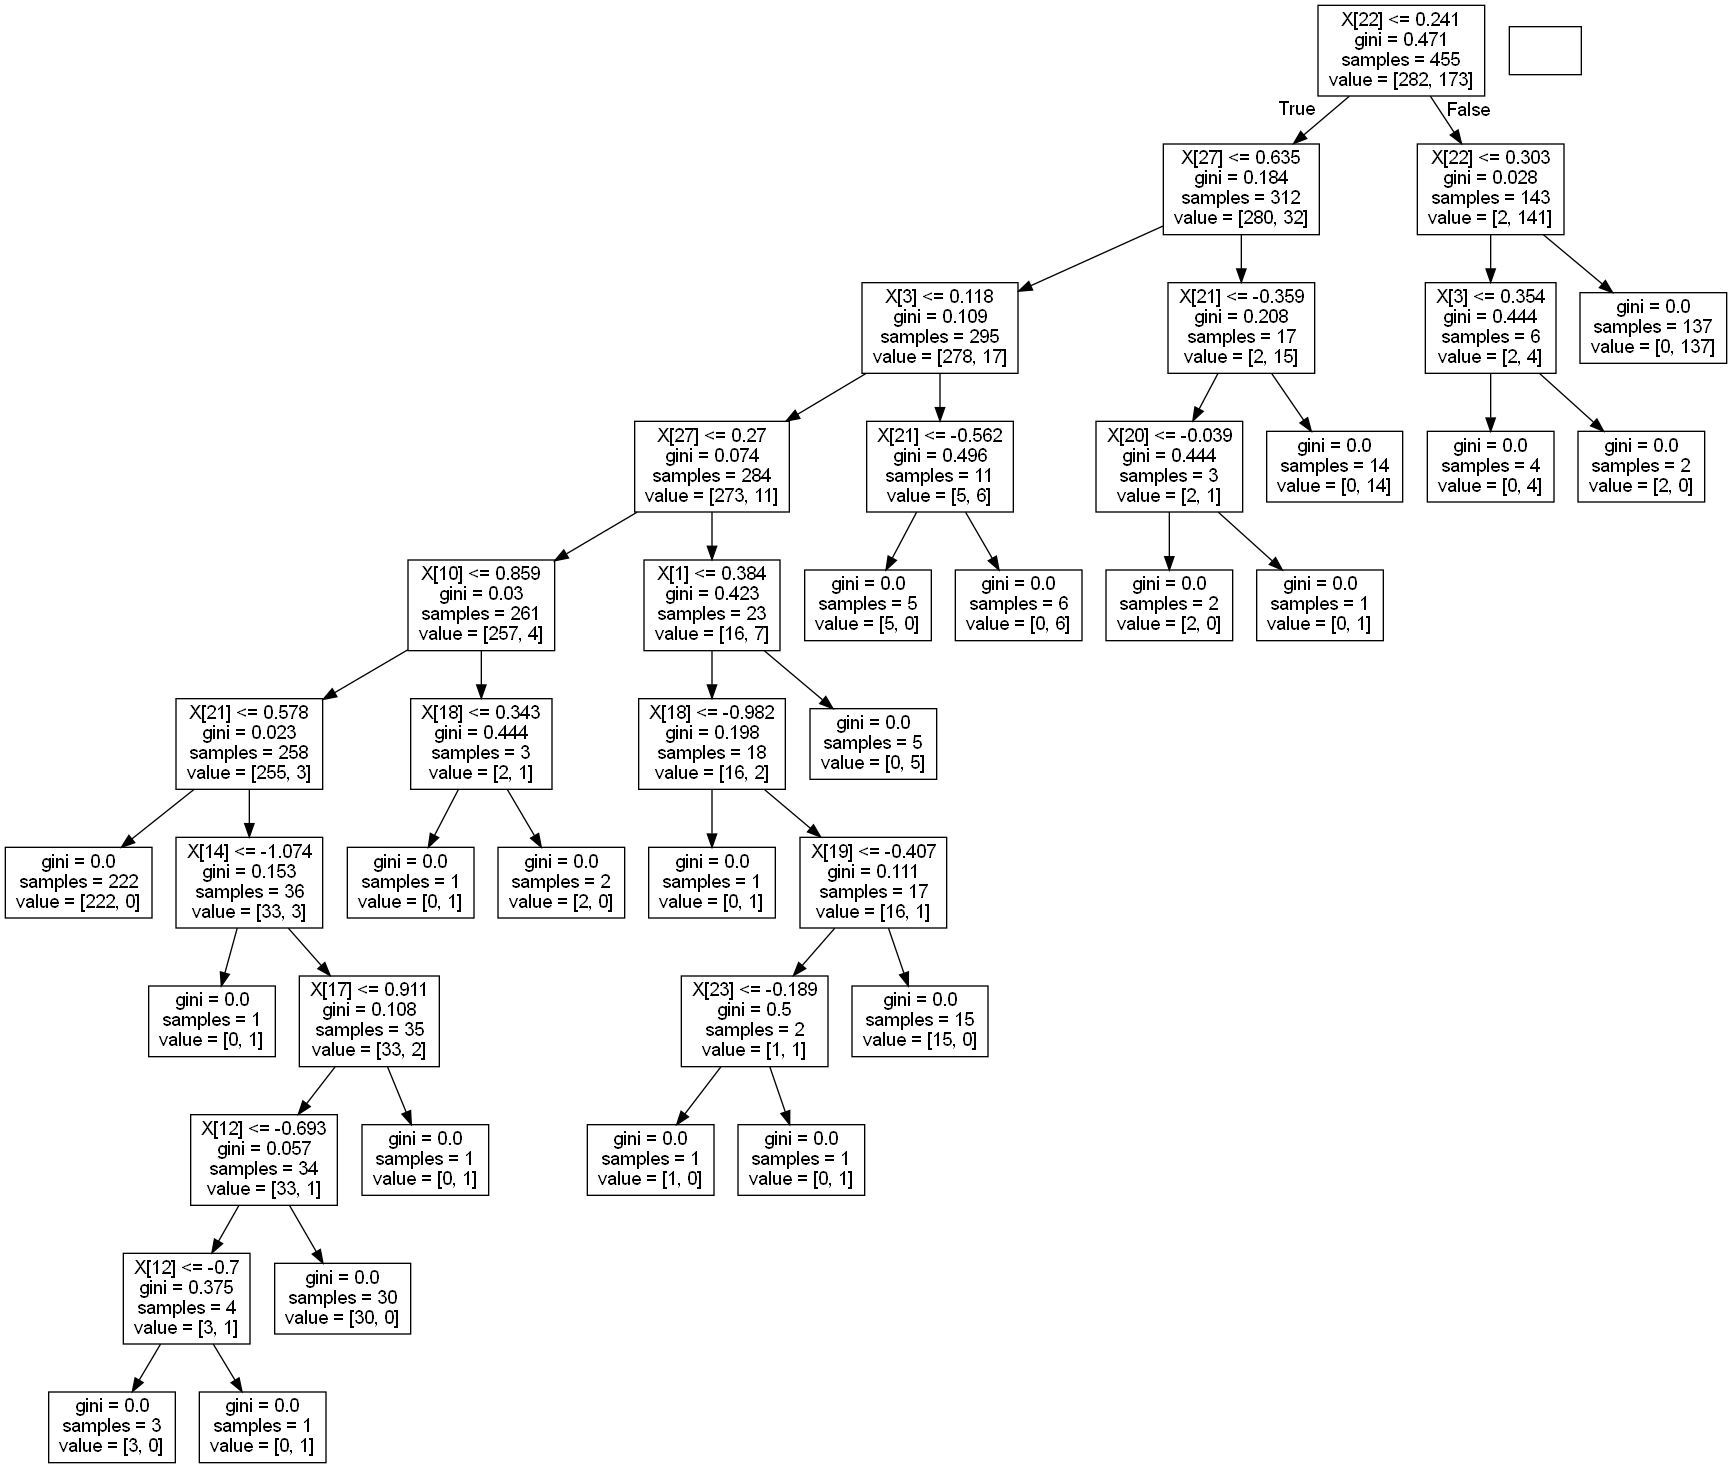

In [24]:
fpr, tpr, thresholds = roc_curve(y_test, tree_y_hat)
roc_auc = roc_auc_score(y_test, tree_y_hat)

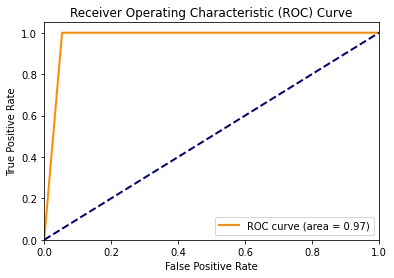

In [25]:
plt.figure() 
plt.plot(fpr, tpr, color='darkorange', lw=2, label = 'ROC curve (area = %0.2f)' %roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()